# Homework 2: Data Cleaning, EDA and Visualizations #

In [1]:
#import any libraries that you may need here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### We would like our new consultants and mentors to not just be technically skilled but also ethical leaders in their fields. Therefore, let us go over some basic data ethics knowledge. ###

## Section 1: Data Ethics

### What are the different types of biases we mentioned during lecture? Pick one that you observe in yourself and describe how it may influence your decision-making.

Cognitive bias is one that will most definitely be present when I am doing my data analysis. Due to particular attributes of background, I do not have the perspective that someone of a different gender or race may have, and as such, won't think through a problem the same way they will. For example, if we were analyzing behavior in the economy, someone who is aware of certain customs in other cultures may know that gift giving is important during a certain time of the year, where I would be confused by the influx of sales. 

### How do you think you could overcome your biases? 

My bias can only be changed by working alongside a diverse cast of analysts so I slowly pick up on the way others solve a problem.

### What is one example of how unethical data analysis impacted a group of people? Avoid repeating the lecture example. 

There have been several experiments throughout the years to build a model that was capable of recognizing fascial beauty. However, due to bias in the data and a lack of diversity in non-white photos, the model did not generalize well to all ethnicities, and labeled white skinned individuals as more attractive than non-white. Obviously this was a bad model and made a few headlines back in the day.

## Section 2: Data Cleaning

### Pick out a dataset that you are interested in working with on [Kaggle](https://www.kaggle.com/datasets)! You should continue working with it in future homeworks so that you have a comprehensive data science project by the end of the semester so pick a good one.
### Download it and add it to the same folder that you are working in so that you are able to load it easily. You can refer to the [slides](https://docs.google.com/presentation/d/1UPj0F_I0CYoiUrbuSR9sYq50FEh8-RDG4usnTFaUBJI/edit#slide=id.g1c0cc4ea8d8_0_1369) that we used for onboarding for any help. ###

In [2]:
# load your dataset here, df is short for DataFrame. 
# E.g.You can use pd.read_csv() for csv files. 
df = pd.read_csv("World Wushu Comp 2017.csv")
df['Gender'].value_counts()

M    170
F     37
Name: Gender, dtype: int64

####  Example

In [3]:
elections = pd.read_csv("elections.csv")
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


### Now let's do some data cleaning! Here are a list of questions that you should think through and answer while looking at your data. If your data is from kaggle, it might already be really clean, but practise answering these questions. 

### *At this point, just answer these questions and examine your data but don't attempt to clean it yet* ###

- Does your data contain unrealistic or incorrect values?
    - Dates in the future
    - Locations that don’t exist
    - Negative counts
- Does your data violate obvious dependencies?
    - Age and birthday not matching
- Is the data coherent and consistent?
    - Misspellings and inconsistent labels
    - Was the data entered by hand?
- Are there signs of data falsification?
    - Repeated names, fake looking email addresses, uncommon names or fields
- Do we need to convert any of the variable types in order to prepare for modelling?
    - Qualitative variables that you might want to convert to numbers
- Any other interesting observations?

Write your answers to each of the questions here 

Q1: Does your data contain unrealistic or incorrect values?

The data seems to be realistic, properly documenting the scores of the competitors during the competition and having reasonable values for all columns.

Q2: Does your data violate obvious dependencies?

The only dependency is the region and home country columns, and they seem to line up correctly.

Q3: Is the data coherent and consistent?

The data is very understandable, especially with the online documentation, and everything seems consistent in terms of scale and range. 

Q4: Are there signs of data falsification?

I can see no signs of falsification.

Q5: Do we need to convert any of the variable types in order to prepare for modelling?

Some columns such as B_Score_Cat need to be one hot encoded.

Q6: Any other interesting observations?

There seem to be many more women than men in the dataset. 

In [4]:
# Any exploratory code here
# You can refer to the pandas section of the slides to do this
elections.describe()

,Year,Popular vote,%
count,182.000000,1.820000e+02,182.000000
mean,1934.087912,1.235364e+07,27.470350
std,57.048908,1.907715e+07,22.968034
min,1824.000000,1.007150e+05,0.098088
25%,1889.000000,3.876395e+05,1.219996
50%,1936.000000,1.709375e+06,37.677893
75%,1988.000000,1.897775e+07,48.354977
max,2020.000000,8.126892e+07,61.344703


### More factors to consider

Here is a list of a few more questions to consider while data cleaning! Answer them to get a deeper understanding of your data.

- Do any of the keys in each table reference each other?
    - Primary keys are the column or set of columns in a table that determine the values of the remaining columns
    - Foreign keys are the column or sets of columns that reference primary keys in other tables
    - Can we merge them tables?
- What does each field specify? 
    - What is the variable type? 
    - Qualitative(Ordinal and Nominal), Quantitative (Continuous and discrete)
    - String, integer, float, list, array etc.
- Granularity? What does each record represent? Are there aggregations?
- Where was this data collected from? What types of questions were asked to gather this data? How representative is it? When was it collected?
- Truncated data 
    - Check the platform that you are working on, does it limit your data size?
- Time zone inconsistencies
    - Convert to common timezone
- Duplicated records or fields -> eliminate carefully
- Spelling errors
- Units not specified or inconsistent
- Missing Data
- Redundant data
- Simplify 
    - Take one column
    - Combine multiple columns  into one
- Aggregation
    - groupby


Q1: Do any of the keys in each table reference each other?

The primary key seems to be the name of the athlete and the event, and it does not reference any other table. 

Q2: What does each field specify?

The name, country, region, event, and gender are qualitative nominal and strings. The placecat, rank and b_score_cat are qualitative ordinal, with rank being an integer and placecat and b_score_cat being a string. The overall_score, a_score, b_score, c_score, time, and nandu_completed are are quantitative continuous and are all integers/doubles. a_dec_cnt, nandu_miss, and nandu_total are quantitative discrete and are doubles.  

Q3: Granularity? What does each record represent? Are there aggregations?

Each data point is the results of each athlete and event.

Q4: Where was this data collected from? What types of questions were asked to gather this data? How representative is it? When was it collected?

This data was collected from the records of wushu events. The collector likely wanted to know information about the top wushu athletes, in which case, this data is very representative. The data is from 2017.

Q5: Truncated data

The data is relatively short, so no data is cutoff. 

Q6: Timezone

There are no timezone variables.

Q7: Duplicate

There are no duplicate values.

Q8: Units

Many columns do not have units, however this makes sense since they are arbitrary variables used to denote which athlete performed better than the other. The nandu_completed column has been changed to decimals.

Please see cell below for answers to further questions.

In [5]:
# Any exploratory code here. 
# You can refer to the pandas section of the slides to do this
df['Nandu_Completed'] = df['Nandu_Completed'].str.rstrip('%').astype('float') / 100.0
average_for_gender = df.groupby('Gender').mean()
display(df)
display(average_for_gender)

,Name,Country,Overall_Score,Rank,A_Score,B_Score,C_Score,Time,PlaceCat,Region,Event,Gender,B_Score_Cat,A_Ded_Cnt,Nandu_Miss,Nandu_Total,Nandu_Completed
0,Zhizhao Chang,CHN,9.70,1,5.0,2.70,2.00,1.40,Gold,China,Changquan (Longfist),M,Superior,0,0,9,1.00
1,Achmad Hulaefi,INA,9.64,2,5.0,2.64,2.00,1.26,Top10,Asia,Changquan (Longfist),M,Superior,0,0,12,1.00
2,Pavel Muratov,RUS,9.63,3,5.0,2.63,2.00,1.25,Top10,Russia,Changquan (Longfist),M,Superior,0,0,11,1.00
3,Wai Kin Yeap,MAS,9.62,4,5.0,2.62,2.00,1.41,Top10,Asia,Changquan (Longfist),M,Superior,0,0,12,1.00
4,Hibiki Betto,JPN,9.58,5,5.0,2.58,2.00,1.27,Top10,Asia,Changquan (Longfist),M,Superior,0,0,12,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Leslie Kwan,CAN,8.56,23,4.6,2.41,1.55,1.44,Top30,America,Jianshu (Straightsword),M,Average,4,2,12,0.83
203,Aditya Kumar,IND,8.54,24,4.6,2.39,1.55,1.26,Top30,India,Jianshu (Straightsword),M,Average,3,2,12,0.83
204,Dan Rio Rodriguez,ESP,8.47,25,4.4,2.32,1.75,1.29,Top30,Europe,Jianshu (Straightsword),M,Average,6,2,12,0.83
205,Yaowen Zhang,CHN,8.45,26,4.6,2.70,1.15,1.45,Top30,China,Jianshu (Straightsword),M,Superior,2,3,9,0.67


,Overall_Score,Rank,A_Score,B_Score,C_Score,Time,A_Ded_Cnt,Nandu_Miss,Nandu_Total,Nandu_Completed
Gender,,,,,,,,,,
F,8.995946,19.000000,4.718919,2.466216,1.810811,1.325676,2.594595,1.081081,11.972973,0.909189
M,9.026882,18.758824,4.737647,2.468059,1.821176,1.336647,2.494118,0.952941,11.682353,0.914765


## Addressing Missing Data/ Default Values

### As you cleaned your data, you may have observed missing data/ default values. Decide what to do with these values and explain your decision-making process.

Here are some methods to deal with missing values:
- Drop records with missing values
    - Check for biases induced by missing values - there may be trends in why something is missing
    - This requires domain knowledge to check for induced bias
- Imputation: Inferring missing values
    - Replace with average value (closest related subgroup mean)
    - Replace with a random value from the closest subgroup(Hot deck imputation) 
- Numerical: 
    - mean, mode, median
- Categorical
    - Mode, new category
- Directly model missing values during future analysis

There are no missing values.

## Handling outliers

### Now let's handle any outliers. Same process as before!

Here are some methods to deal with handling outliers:
- Drop records with outliers
    - Check for biases induced by missing values - there may be trends in why something is missing
    - This requires domain knowledge to check for induced bias
- Replace, as with Inferring missing values
    - Typically with min or max
- Binning
    - E.g. greater than 5

There don't seem to be any outliers. Most of the numerical values have means that are very close to the median, indicating a lack of outliers. Two columns did not follow this trend but are explainable. A_Ded_Cnt has a mean of 2.5 and a median of 2, but looking at the distribution, the values increment to slowly to a value of 12. There are many 0's, which probably explains the statistic. Similarly, Nandu_Miss has many 0 values, so its median is 0. However, the non-zero values progress slowly, meaning they are not outliers. 

In [6]:
df.describe()

,Overall_Score,Rank,A_Score,B_Score,C_Score,Time,A_Ded_Cnt,Nandu_Miss,Nandu_Total,Nandu_Completed
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,9.021353,18.801932,4.734300,2.467729,1.819324,1.334686,2.512077,0.975845,11.734300,0.913768
std,0.611582,11.740908,0.246593,0.160875,0.297830,0.116539,2.250911,1.429372,1.000938,0.137125
min,5.700000,1.000000,3.500000,1.700000,0.200000,1.210000,0.000000,0.000000,5.000000,0.200000
25%,8.740000,9.000000,4.600000,2.370000,1.700000,1.280000,1.000000,0.000000,12.000000,0.830000
50%,9.170000,18.000000,4.800000,2.490000,2.000000,1.320000,2.000000,0.000000,12.000000,1.000000
75%,9.450000,27.000000,4.900000,2.600000,2.000000,1.370000,4.000000,2.000000,12.000000,1.000000
max,9.720000,50.000000,5.000000,2.720000,2.000000,2.370000,12.000000,8.000000,14.000000,1.000000


In [7]:
df['Nandu_Miss'].sort_values(ascending=False)

121    8
117    7
120    6
155    6
176    5
      ..
89     0
90     0
91     0
92     0
103    0
Name: Nandu_Miss, Length: 207, dtype: int64

## Let's clean!

### Now that we have a much deeper understanding of our data and have dealt with a few preliminary issues, clean up the data so that it is useful and accurate!  

In [8]:
def numerizing_B_Score_Cat(value):
    if value == 'Average':
        return 1
    if value == 'Superior':
        return 2
    if value == 'Inferior':
        return 0

df['B_Score_Cat'] = df['B_Score_Cat'].apply(numerizing_B_Score_Cat)
df['Weapon'] = df['Event'].str.split().str[1].str[1:-1]
df['Event'] = df['Event'].str.split().str[0]
df

,Name,Country,Overall_Score,Rank,A_Score,B_Score,C_Score,Time,PlaceCat,Region,Event,Gender,B_Score_Cat,A_Ded_Cnt,Nandu_Miss,Nandu_Total,Nandu_Completed,Weapon
0,Zhizhao Chang,CHN,9.70,1,5.0,2.70,2.00,1.40,Gold,China,Changquan,M,2,0,0,9,1.00,Longfist
1,Achmad Hulaefi,INA,9.64,2,5.0,2.64,2.00,1.26,Top10,Asia,Changquan,M,2,0,0,12,1.00,Longfist
2,Pavel Muratov,RUS,9.63,3,5.0,2.63,2.00,1.25,Top10,Russia,Changquan,M,2,0,0,11,1.00,Longfist
3,Wai Kin Yeap,MAS,9.62,4,5.0,2.62,2.00,1.41,Top10,Asia,Changquan,M,2,0,0,12,1.00,Longfist
4,Hibiki Betto,JPN,9.58,5,5.0,2.58,2.00,1.27,Top10,Asia,Changquan,M,2,0,0,12,1.00,Longfist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Leslie Kwan,CAN,8.56,23,4.6,2.41,1.55,1.44,Top30,America,Jianshu,M,1,4,2,12,0.83,Straightsword
203,Aditya Kumar,IND,8.54,24,4.6,2.39,1.55,1.26,Top30,India,Jianshu,M,1,3,2,12,0.83,Straightsword
204,Dan Rio Rodriguez,ESP,8.47,25,4.4,2.32,1.75,1.29,Top30,Europe,Jianshu,M,1,6,2,12,0.83,Straightsword
205,Yaowen Zhang,CHN,8.45,26,4.6,2.70,1.15,1.45,Top30,China,Jianshu,M,2,2,3,9,0.67,Straightsword


In [9]:
df

,Name,Country,Overall_Score,Rank,A_Score,B_Score,C_Score,Time,PlaceCat,Region,Event,Gender,B_Score_Cat,A_Ded_Cnt,Nandu_Miss,Nandu_Total,Nandu_Completed,Weapon
0,Zhizhao Chang,CHN,9.70,1,5.0,2.70,2.00,1.40,Gold,China,Changquan,M,2,0,0,9,1.00,Longfist
1,Achmad Hulaefi,INA,9.64,2,5.0,2.64,2.00,1.26,Top10,Asia,Changquan,M,2,0,0,12,1.00,Longfist
2,Pavel Muratov,RUS,9.63,3,5.0,2.63,2.00,1.25,Top10,Russia,Changquan,M,2,0,0,11,1.00,Longfist
3,Wai Kin Yeap,MAS,9.62,4,5.0,2.62,2.00,1.41,Top10,Asia,Changquan,M,2,0,0,12,1.00,Longfist
4,Hibiki Betto,JPN,9.58,5,5.0,2.58,2.00,1.27,Top10,Asia,Changquan,M,2,0,0,12,1.00,Longfist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Leslie Kwan,CAN,8.56,23,4.6,2.41,1.55,1.44,Top30,America,Jianshu,M,1,4,2,12,0.83,Straightsword
203,Aditya Kumar,IND,8.54,24,4.6,2.39,1.55,1.26,Top30,India,Jianshu,M,1,3,2,12,0.83,Straightsword
204,Dan Rio Rodriguez,ESP,8.47,25,4.4,2.32,1.75,1.29,Top30,Europe,Jianshu,M,1,6,2,12,0.83,Straightsword
205,Yaowen Zhang,CHN,8.45,26,4.6,2.70,1.15,1.45,Top30,China,Jianshu,M,2,2,3,9,0.67,Straightsword


## Section 3: EDA 

### Study the data and observe any potential trends/ consider models that you might be able to implement. Study the relationships between the different columns and see if you can find any insights. List at least 2 potential project ideas.

It would be interesting to analyze/visualize how each country performed in the competition. Maybe some countries are better at certain weapons than others, and maybe some countries attempt harder movements, indicated by the C score. Another thing that would be interesting would be to try and classify which ranking a person will get based on their scores and other features. Of course a higher score means a higher placement, but since placement also depends on the score of others, it would be interesting to see how well we can predict someone's success after they finished their routine. 

# Section 4: Visualizations

### This is also part of EDA! The whole process is rather cyclical. For this part, make 3 visualizations and describe what you see. 

### Then, make 2 out of 3 these visualizations.
### 1. Heat Map
### 2. KDE Plot
### 3. Box Plot

### So in total, you should have made 5 visualizations.

array(['Longfist'], dtype=object)

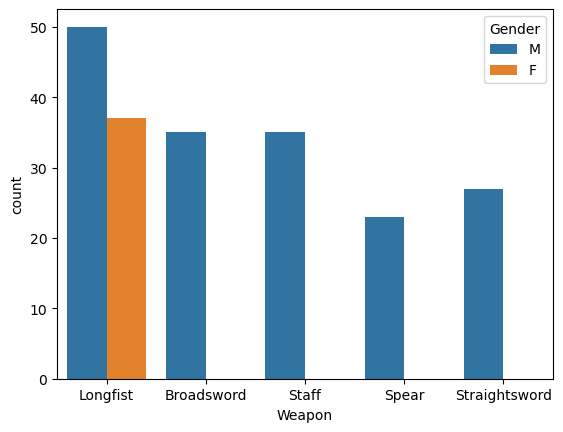

In [10]:
#Visualization 1
sns.countplot(data = df, x = 'Weapon', hue = 'Gender')
df[df['Gender'] == 'F']['Weapon'].unique()

# I Actually did not know that women only participated in Longfist during these competitions. This seems odd to me, and makes me think that
# the dataset I have is not complete. Either way, this is a very interesting find, and needs to be addressed when I make any type of model.
# Also, it is interesting to see how Longfist is notably the most popular, even though Broadsword is typically considered very popular. 

<AxesSubplot:xlabel='B_Score', ylabel='Nandu_Total'>

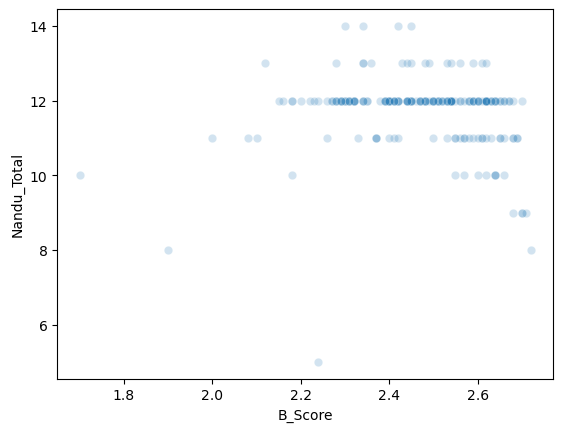

In [11]:
#Visualization 2

sns.scatterplot(data = df, x = 'B_Score', y = 'Nandu_Total', alpha=0.2)

# I wanted to see if there were a correlation between the B_Score and the Nandu_Total, meaning if the athlete got a good performance score,
# how complex was their routine. It seems that you don't necessarily need to have a high Nandu_Total to perform well. This implies that 
# athletes are only incorporating movements they can achieve into their routines, which makes sense.  

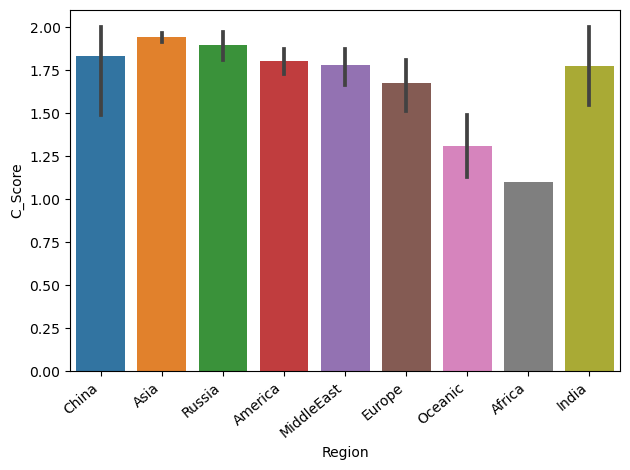

In [12]:
#Visualization 3

ax = sns.barplot(data = df, x = 'Region', y = 'C_Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# This plot demonstrates the C_score among regions. Typically, the regions have similar C_Scpre, meaning that they are all having relatively 
# complex routines and are conducting them well. It is really only Oceanic and Africa that are having simpler routines. It would be interesting
# # to see how their overall scores compare to other regions, as perhaps they are using a different strategy to succeed. 

<AxesSubplot:xlabel='Time', ylabel='Overall_Score'>

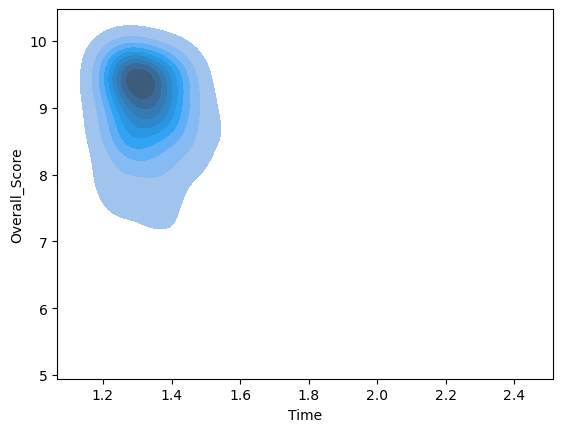

In [13]:
#Visualization 4

sns.kdeplot(data = df, y = 'Overall_Score', x = 'Time', fill=True)

# This plot demonstrates how the distributions of time and overall score compare to each other. It appears that there is no preference for 
# length of performance, as the kde plot is more circular. However, it helps to note that the length of the routine is usually 1.4 minutes.

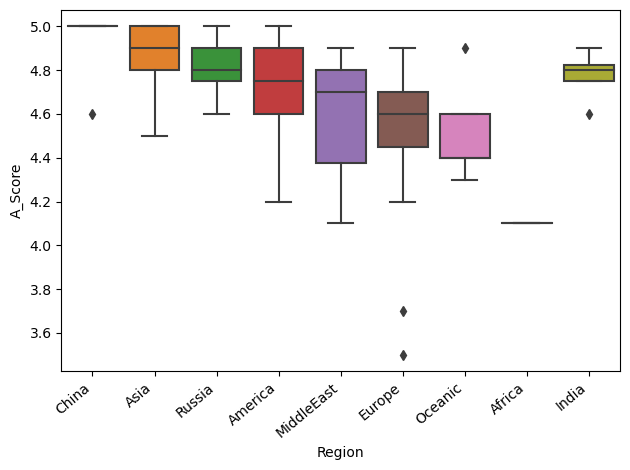

In [14]:
#Visualization 5

ax = sns.boxplot(data = df, x = 'Region', y = 'A_Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
# This plot displays the distribution of the the A_Score for each region. The quality seems to be skewed towards the lower side for each 
# country, which makes sense since most of these athletes are hitting the max score. It is interesting to see, however, how Asia typically
# has more maxed out scores than the other regions. Furthermore, there seems not to be enough data for China and Africa, so there will likely
# be ignored during the modeling phase. 

### Which visualization is the best for your dataset and why?

In [15]:
# I felt the A_Score vs Region plot was the best since it gave the most insight both in terms of which region had the best quality of performance
# as well as telling us which regions should be ignored during the modeling phase of the project.

# Good job!

### As a quick wrap-up, think about how your biases might have affected your judgement and if there is anything you want to work on. 

### As you can see, working with a dataset outside of class is much less structured. However, with practice, you will be become much sharper and efficient at wrangling data. Good luck with the next project!

In [16]:
# Since I have practiced martial arts, I am more familiar with how an athlete might be thinking when creating their routine. Therefore, I know 
# how some variables may affect others. However, it is helpful to note that I never practiced Wushu, but instead its sibling discipline. So, 
# I am not an expert when it comes to this dataset. Furthermore, EDA makes me think that this dataset is not complete, given the lack of 
# representation of women. However, I will go forward with this dataset, and document my thoughts. 

### Fantastic job ~ Remember to push all your changes your GitHub repository and submit on Gradescope.
### Thank you for your time :)
### That's all for this homework! 